Previsão de Salário

Informações sobre o DataSet

O dataset possui um total de 14.577 linhas e possui 7 Colunas

1) Matrícula - Indentificação do colaborador
2) Idade
3) Genêro 
4) Escolaridade
5) Cargo
6) Anos de Experiência
7) Salário

In [1]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install -U scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install pandas

In [3]:
#Importação das bibliotecas
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error 

In [4]:
#Ler o arquivo .csv
salary_df = pd.read_csv('Dados.csv', sep=';')
salary_df.head()                       

,Matricula,Idade,Sexo,Escolaridade,Cargo,Anos_experiencia,Salario
0,502511,66,M,Pós-Graduação,Advogado de Contratos,34,11833.93
1,581302,47,F,4ª Série Incompleta,Afiador de Ferramentas,9,1773.79
2,801931,23,M,4ª Série Incompleta,Afiador de Ferramentas,0,1773.79
3,806233,23,M,4ª Série Incompleta,Afiador de Ferramentas,0,1773.79
4,511586,53,M,4ª Série Completa,Afiador de Ferramentas,21,1872.35


In [5]:
#Buscar Informações do dataset
salary_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14087 entries, 0 to 14086
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Matricula         14087 non-null  int64  
 1   Idade             14087 non-null  int64  
 2   Sexo              14087 non-null  object 
 3   Escolaridade      14087 non-null  object 
 4   Cargo             14087 non-null  object 
 5   Anos_experiencia  14087 non-null  int64  
 6   Salario           14087 non-null  float64
dtypes: float64(1), int64(3), object(3)
memory usage: 770.5+ KB


Pre processamento de dados

In [6]:
#Detectando valores nulos
salary_df.isnull().sum()

Matricula           0
Idade               0
Sexo                0
Escolaridade        0
Cargo               0
Anos_experiencia    0
Salario             0
dtype: int64

In [7]:
#Deletando valores nulos
salary_df.dropna(inplace = True)

In [8]:
#Descrições
salary_df.describe()

,Matricula,Idade,Anos_experiencia,Salario
count,14087.000000,14087.000000,14087.000000,14087.000000
mean,628085.364095,35.267694,4.521971,2422.693104
std,102977.745198,11.327685,5.752769,2270.589733
min,500017.000000,16.000000,0.000000,805.860000
25%,567746.500000,26.000000,1.000000,1773.790000
50%,584160.000000,34.000000,2.000000,1773.790000
75%,599877.000000,44.000000,7.000000,2157.440000
max,806877.000000,74.000000,47.000000,104286.660000


In [9]:
#Checando os valores unicos de cargos
salary_df['Cargo'].unique()

array(['Advogado de Contratos', 'Afiador de Ferramentas',
       'Ajudante de Motorista', 'Analista Adm. - Alimentos',
       'Analista Adm. - Custos', 'Analista Adm. - Logística',
       'Analista Adm. - OSM', 'Analista Adm. - Projetos',
       'Analista Adm. - Qualidade', 'Analista Adm. - Seguros',
       'Analista Adm. - Suprimentos', 'Analista Adm. - Varejo',
       'Analista Ambiental', 'Analista Comercial', 'Analista Contábil',
       'Analista Financeiro', 'Analista Gestão da Qualidade',
       'Analista Marketing de Produto', 'Analista P&D',
       'Analista TI - Ambientes', 'Analista TI - Funcional',
       'Analista TI - Infra', 'Analista TI - Seg. Informação',
       'Analista TI - Service Desk', 'Analista Tributário',
       'Analista de Comunicação', 'Analista de Comércio Exterior',
       'Analista de Cooperativismo', 'Analista de Gestão de Pessoas',
       'Analista de Logística - Inter.', 'Analista de Logística - PCL',
       'Analista de Logística - Proj.', 'Analista d

In [10]:
#Contagem dos cargos
salary_df['Cargo'].value_counts()

Cargo
Aux. de Produção                  5703
Operador de Máquina - Industr.     735
Aux. Operacional - Higieniz.       588
Motorista                          464
Aux. Operacional - Recolha         380
                                  ... 
Gerente de Auditoria                 1
Gerente de Cereais                   1
Gerente de Compras Superm.           1
Gerente de Compras/Importação        1
Advogado de Contratos                1
Name: count, Length: 293, dtype: int64

In [11]:
#Criação de um váriavel para reduzir o numero de cargos
job_title_stats = salary_df['Cargo'].value_counts()
job_title_stats_less_than_50 = job_title_stats[job_title_stats<=50]
job_title_stats_less_than_50.count()

253

In [12]:
#Reduzindo o número de cargos
salary_df['Job Title'] = salary_df['Cargo'].apply(lambda x: 'Others' if x in job_title_stats_less_than_50 else x )
salary_df['Job Title'].nunique()

41

In [13]:
#Buscando as escolaridades unicas
salary_df['Escolaridade'].unique()

array(['Pós-Graduação', '4ª Série Incompleta', '4ª Série Completa',
       '5ª a 8ª Série Incompleta', '1º Grau Completo',
       '2º Grau Incompleto', '2º Grau Completo', 'Superior Incompleto',
       'Superior Completo', 'Técnico', 'Mestrado', 'Não alfabetizado',
       'Doutorado', 'Ph.D.'], dtype=object)

In [14]:
salary_df['Escolaridade'].replace(["Pós-Graduação","Mestrado","Doutorado","Ph.D.","4ª Série Incompleta","5ª a 8ª Série Incompleta","1º Grau Completo","4ª Série Completa","2º Grau Incompleto"],["PG","PG","PG","PG","Fundamental","Fundamental","Fundamental","Fundamental","Fundamental"],inplace=True)

In [15]:
salary_df['Escolaridade'].replace(["2º Grau Completo","Superior Completo","Superior Incompleto","Não alfabetizado"],["Ens. Médio","Superior","Superior","Analfabeto"],inplace=True)

In [16]:
#Buscando generos
salary_df.Sexo.value_counts()

Sexo
M    8139
F    5948
Name: count, dtype: int64

Análise Exploratoria

In [17]:
salary_df.head()

,Matricula,Idade,Sexo,Escolaridade,Cargo,Anos_experiencia,Salario,Job Title
0,502511,66,M,PG,Advogado de Contratos,34,11833.93,Others
1,581302,47,F,Fundamental,Afiador de Ferramentas,9,1773.79,Others
2,801931,23,M,Fundamental,Afiador de Ferramentas,0,1773.79,Others
3,806233,23,M,Fundamental,Afiador de Ferramentas,0,1773.79,Others
4,511586,53,M,Fundamental,Afiador de Ferramentas,21,1872.35,Others


<Axes: xlabel='Escolaridade', ylabel='count'>

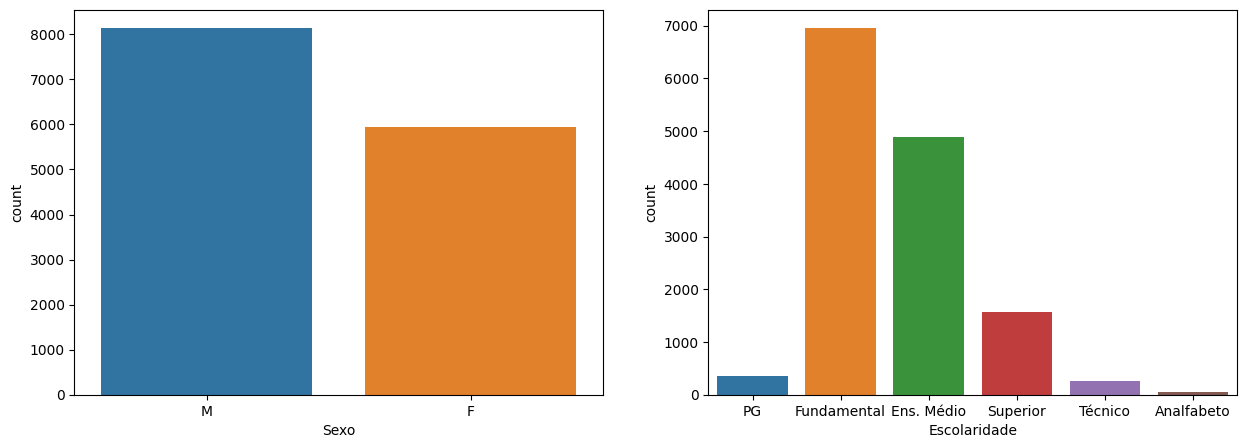

In [18]:
#Distribuição de variáveis categóricas
fig, ax = plt.subplots(1,2,figsize=(15,5))
sns.countplot(x='Sexo',data=salary_df,ax = ax[0])
sns.countplot(x='Escolaridade',data = salary_df,ax=ax[1])

O primeiro gráfico revela que uma parte significante dos colaboradores é do sexo masculino, ultrapassando a quantidade de colaboradores do sexo feminino. O segundo demonstra a distribuição dos colaboradores por escolaridade, demonstrando que a maioria estudaram somente até o fundamental. E também demonstra baixo nível de analfabetismo oque é um indicador muito positivo.

Distribuição da váriaveis continuas

<Axes: xlabel='Salario', ylabel='Count'>

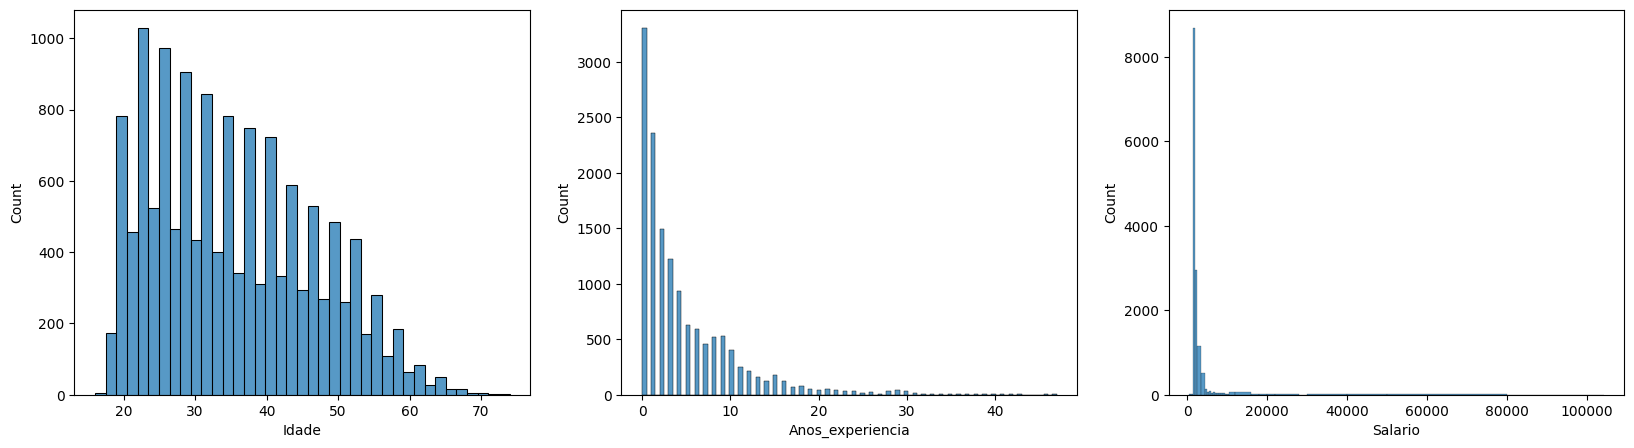

In [19]:
fig, ax = plt.subplots(1,3,figsize=(20,5))
sns.histplot(salary_df['Idade'],ax=ax[0])
sns.histplot(salary_df['Anos_experiencia'],ax=ax[1])
bins = [500,1000,1500,2000,2500,3500,4500,5000,5500,6000,6500,7000,7500,8000,8500,9000,9500,10000,10500,12000,16000,18000,20000,22000,28000,30000,40000,50000,80000,90000,100000, max(salary_df['Salario'])]
sns.histplot(salary_df['Salario'], ax=ax[2], bins=bins)

O grafico 1 demonstra que a maioria dos colaboradores estão na faixa etária entre 20 e 30 anos
O segundo demonstra que a grande maioria dos colaboradores possui menos de 3 anos de experiência
O Terceiro grafico demonstra que a gigantesca maioria dos salários estão concentrados nas primeiras faixas


Top 10 Maiores Salários

[Text(0.5, 1.0, 'Top 10 Maiores Salários')]

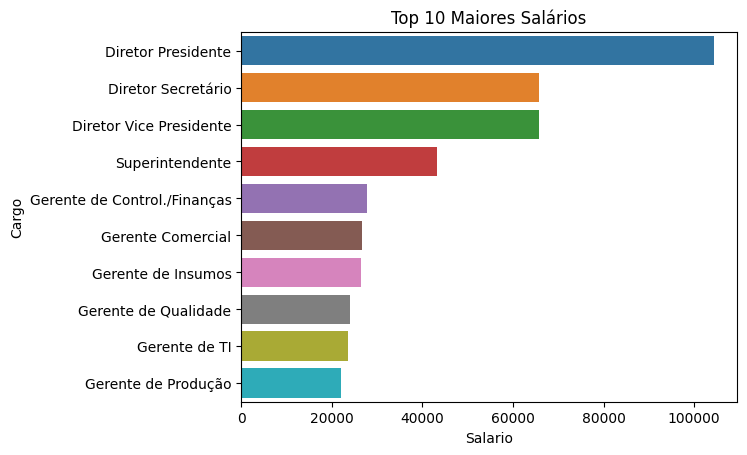

In [20]:
mean_salary_by_job = salary_df.groupby('Cargo')['Salario'].mean().reset_index()
sorted_data = mean_salary_by_job.sort_values(by='Salario',ascending=False)
sns.barplot(x='Salario',y='Cargo',data=sorted_data.head(10)).set(title='Top 10 Maiores Salários')

Baseado neste grafico podemos descobrir que o Diretor Presidente recebe o maior salário

Relacionamento com variável Alvo

[Text(0.5, 1.0, 'Relação entre Escolaridade e Salário')]

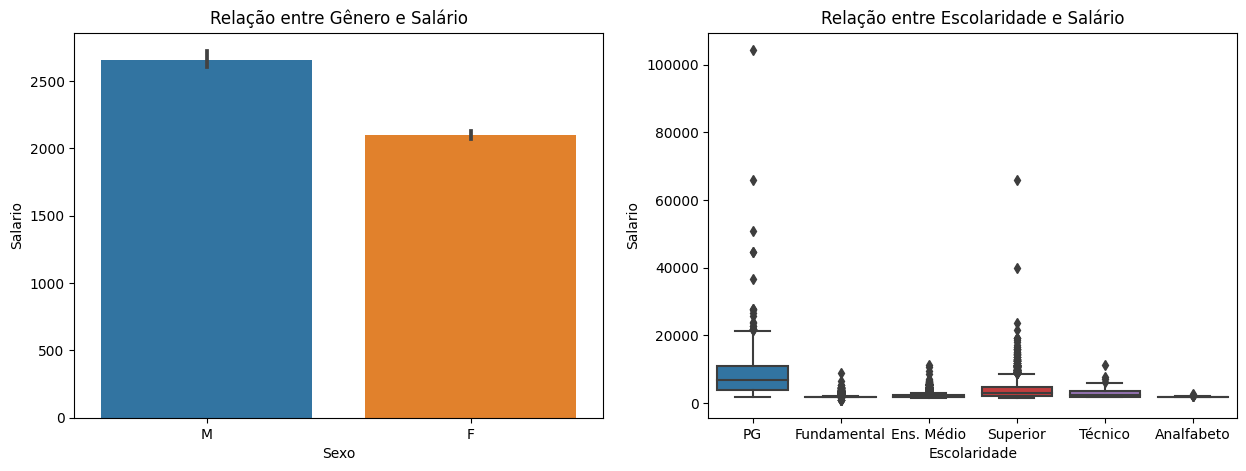

In [21]:
fig, ax = plt.subplots(1,2,figsize=(15,5))
sns.barplot(x='Sexo',y='Salario',data=salary_df,ax=ax[0]).set(title='Relação entre Gênero e Salário')
sns.boxplot(x='Escolaridade',y='Salario',data=salary_df,ax=ax[1]).set(title='Relação entre Escolaridade e Salário')

O grafico da esquerda nos demonstra que existe uma disparidade entre o salário médio em relação ao gênero, aonde os homens recebem mais que as mulheres
O grafico da direita nos demonstra que a escolaridade está relacionada a um salário maior, mostrando que os colaboradores com pos graduação(PG) são os que recebem os maiores salários

[Text(0.5, 1.0, 'Escolaridade vs Salario vs Gênero')]

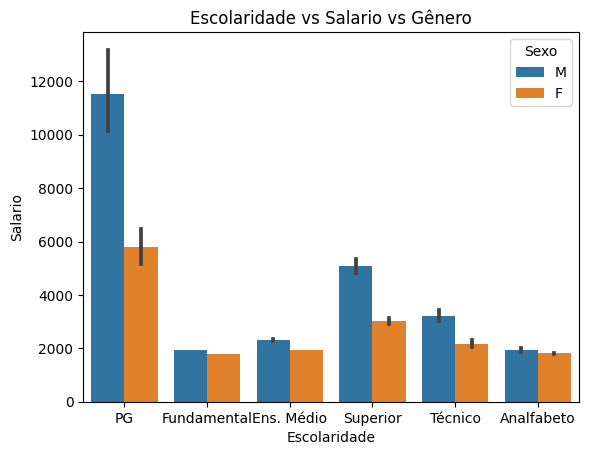

In [22]:
sns.barplot(x='Escolaridade',y='Salario',data=salary_df,hue='Sexo').set(title='Escolaridade vs Salario vs Gênero')

O grafico demonstra que a disparidade de salário entre homens e mulheres se mantém mesmo com colaboradores da mesma escolaridade, podemos tratar como exceção o ensino fundamental que diminuiu 
consideravelmente essa disparidade

Relação entre salário e idade

[Text(0.5, 1.0, 'Relação entre salário e idade')]

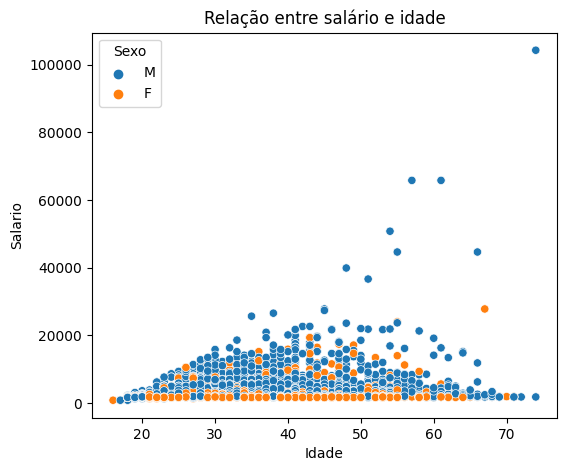

In [23]:
plt.figure(figsize=(6,5))
sns.scatterplot(x='Idade',y='Salario',data=salary_df,hue='Sexo').set(title='Relação entre salário e idade')

O grafico mostra que os salários mais altos geralmente estão relacionados a uma idade mais alta, como por exempplo o maior salário é de um dos colaboradores com maior idade. A disparidade de gênero se mantém. ##REVISAR!!

Pre-Processamento de dados Part 2

Detectando Outliers

In [24]:
# detecting the outliers in salary column using IQR method
Q1 = salary_df.Salario.quantile(0.25)
Q3 = salary_df.Salario.quantile(0.75)
IQR = Q3-Q1
lower = Q1-1.5*IQR
upper = Q3+1.5*IQR

In [25]:
salary_df[salary_df.Salario>upper]

,Matricula,Idade,Sexo,Escolaridade,Cargo,Anos_experiencia,Salario,Job Title
0,502511,66,M,PG,Advogado de Contratos,34,11833.93,Others
57,565799,34,F,Superior,Analista Adm. - Alimentos,6,4231.77,Others
58,573247,48,M,Superior,Analista Adm. - Custos,4,7942.79,Others
59,505333,49,M,PG,Analista Adm. - Custos,29,6787.96,Others
60,565422,25,F,Superior,Analista Adm. - Logística,6,4408.09,Others
...,...,...,...,...,...,...,...,...
13914,508018,52,F,Superior,Vendedor Interno,24,3068.68,Others
13915,554379,28,M,Superior,Vendedor Interno,8,2963.25,Others
13919,546964,34,F,PG,Vendedor Interno,9,2950.51,Others
14085,599220,30,M,Superior,Zootecnista,1,6622.26,Others


In [26]:
salary_df[salary_df.Salario<lower]

,Matricula,Idade,Sexo,Escolaridade,Cargo,Anos_experiencia,Salario,Job Title
10229,597293,18,F,Fundamental,Jovem Aprendiz,1,853.24,Others
10230,593444,18,F,Fundamental,Jovem Aprendiz,1,853.24,Others
10231,805922,17,M,Fundamental,Jovem Aprendiz,0,853.24,Others
10232,806381,18,M,Fundamental,Jovem Aprendiz,0,805.86,Others
10233,806382,17,F,Fundamental,Jovem Aprendiz,0,805.86,Others
10234,806383,16,F,Fundamental,Jovem Aprendiz,0,805.86,Others
10235,806384,17,M,Fundamental,Jovem Aprendiz,0,805.86,Others


In [27]:
#Remover outliers
salary_df = salary_df[(salary_df.Salario >= lower) & (salary_df.Salario <= upper)]

In [28]:
# Mapeando Coluna Escolaridade
education_mapping = {"Analfabeto":0,"Fundamental":1,"Ens. Médio":2,"Superior":3,"Técnico":4,"PG":5}
salary_df['Escolaridade'] = salary_df['Escolaridade'].map(education_mapping)

In [29]:
le = LabelEncoder()
salary_df['Sexo'] = le.fit_transform(salary_df['Sexo'])

In [30]:
salary_df= salary_df.drop("Matricula",axis=1)

<Axes: >

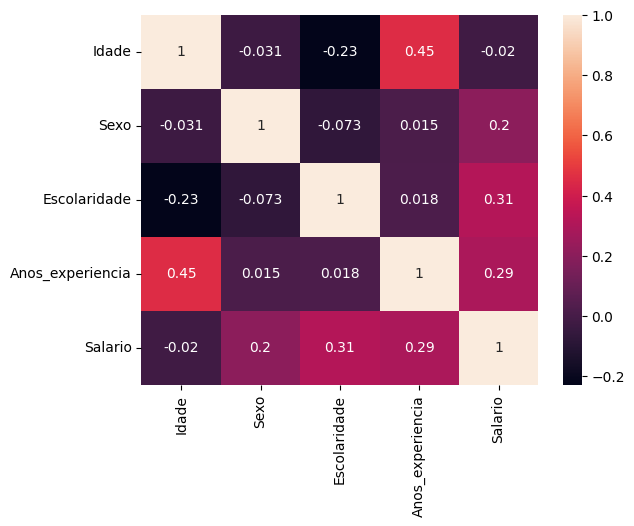

In [31]:
# Grafico de correlação
numeric_columns = salary_df.select_dtypes(include=[np.number])
sns.heatmap(numeric_columns.corr(), annot=True)

Com este gráfico conseguimos verificar que existe uma alta correlação entre salário e escolaridade e também entre salário e anos de experiência. Vemos também que a correlação entre idade
e salário é baixa

In [38]:
dummies = pd.get_dummies(salary_df['Cargo'],drop_first=True)
salary_df = pd.concat([salary_df,dummies],axis=1)

In [39]:
salary_df.drop('Cargo',inplace=True,axis=1)
salary_df.head()

,Idade,Sexo,Escolaridade,Anos_experiencia,Salario,Assist. de Operações,Assist. de Operações - Estoque,Atendente de Loja,Aux. Administrativo,Aux. Operacional - Almoxarife,...,Trainee,Tratorista,Técnico de Enfermagem,Técnico de Seg. do Trabalho,Vacinador,Vendedor,Vendedor Externo,Vendedor Interno,Vigilante,Zelador
1,47,0,1,9,1773.79,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,23,1,1,0,1773.79,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,23,1,1,0,1773.79,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,53,1,1,21,1872.35,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,36,1,1,9,1872.35,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [40]:
# Separar o dataset em features e target
features = salary_df.drop('Salario',axis=1)
target = salary_df['Salario']

Treinamento algoritmo de previsão

In [41]:
x_train,x_test,y_train,y_test = train_test_split(features,target,test_size=0.25,random_state=42)
x_train.shape

(9105, 140)

In [42]:
# Criar um dicionario para hyperparameter tuning
model_params = {
    'Linear_Regression':{
        'model':LinearRegression(),
        'params':{
            
        }
    },
    'Decision_Tree':{
        'model':DecisionTreeRegressor(),
        'params':{
            'max_depth':[2,4,6,8,10],
            'random_state':[0,42],
            'min_samples_split':[1,5,10,20]
        }
    },
    'Random_Forest':{
        'model':RandomForestRegressor(),
        'params':{
            'n_estimators':[10,30,20,50,80]
        }
    }
}

In [43]:
# Hyper parameter tuning through grid search cv
score=[]

for model_name,m in model_params.items():
    clf = GridSearchCV(m['model'],m['params'],cv=5,scoring='neg_mean_squared_error')
    clf.fit(x_train,y_train)
    
    score.append({
        'Model':model_name,
        'Params':clf.best_params_,
        'MSE(-ve)':clf.best_score_
    })
pd.DataFrame(score)    

,Model,Params,MSE(-ve)
0,Linear_Regression,{},-4.172776e+18
1,Decision_Tree,"{'max_depth': 10, 'min_samples_split': 20, 'ra...",-2.128862e+04
2,Random_Forest,{'n_estimators': 50},-1.231606e+04


Com base apenas no MSE (Erro Quadrático Médio) negativo, a escolha seria o modelo "Random Forest", pois possui o menor valor de MSE negativo entre os modelos apresentados. 

In [44]:
# Order of the best models 
s = pd.DataFrame(score)
sort = s.sort_values(by = 'MSE(-ve)',ascending=False)
sort

,Model,Params,MSE(-ve)
2,Random_Forest,{'n_estimators': 50},-1.231606e+04
1,Decision_Tree,"{'max_depth': 10, 'min_samples_split': 20, 'ra...",-2.128862e+04
0,Linear_Regression,{},-4.172776e+18
